In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


In [19]:
df = pd.read_csv("framingham.csv")

# Drop rows with missing values
df = df.dropna()

# Split features and target
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)


In [22]:
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_resampled, y_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [23]:
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

print("✅ Accuracy :", round(accuracy_score(y_test, y_pred), 2))
print("🎯 Precision:", round(precision_score(y_test, y_pred), 2))
print("🛡️ Recall   :", round(recall_score(y_test, y_pred), 2))
print("📊 AUC Score:", round(roc_auc_score(y_test, y_probs), 2))


✅ Accuracy : 0.8
🎯 Precision: 0.26
🛡️ Recall   : 0.16
📊 AUC Score: 0.63


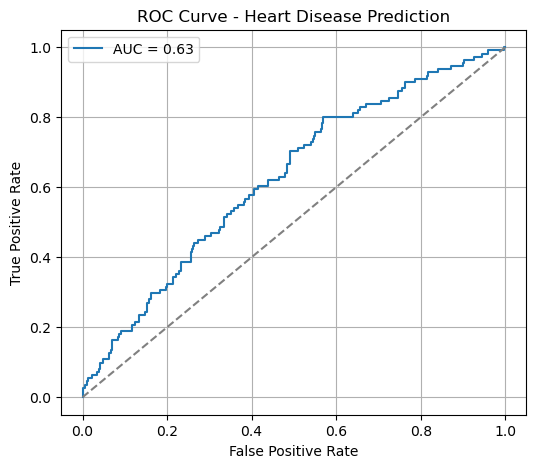

In [24]:
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Heart Disease Prediction")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
# Collect user input
input_data = {
    "male": int(input("Gender (1 = Male, 0 = Female): ")),
    "age": int(input("Age: ")),
    "education": int(input("Education Level (1 to 4): ")),
    "currentSmoker": int(input("Current smoker? (1 = Yes, 0 = No): ")),
    "cigsPerDay": int(input("Cigarettes per day: ")),
    "BPMeds": int(input("On BP medication? (1 = Yes, 0 = No): ")),
    "prevalentStroke": int(input("Previous stroke? (1 = Yes, 0 = No): ")),
    "prevalentHyp": int(input("Hypertensive? (1 = Yes, 0 = No): ")),
    "diabetes": int(input("Diabetic? (1 = Yes, 0 = No): ")),
    "totChol": float(input("Total cholesterol: ")),
    "sysBP": float(input("Systolic BP: ")),
    "diaBP": float(input("Diastolic BP: ")),
    "BMI": float(input("BMI: ")),
    "heartRate": int(input("Heart rate: ")),
    "glucose": float(input("Glucose: "))
}

# Convert to DataFrame
input_df = pd.DataFrame([input_data])

# Predict
risk_prob = model.predict_proba(input_df)[0][1]
risk_class = model.predict(input_df)[0]

# Show result
print("\n💡 Prediction:")
print("Heart Disease Risk (Next 10 years):", "✅ Yes" if risk_class else "✅ No")
print(f"Risk Probability: {risk_prob * 100:.2f}%")


Gender (1 = Male, 0 = Female):  1
Age:  55
Education Level (1 to 4):  3
Current smoker? (1 = Yes, 0 = No):  0
Cigarettes per day:  0
On BP medication? (1 = Yes, 0 = No):  1
Previous stroke? (1 = Yes, 0 = No):  0
Hypertensive? (1 = Yes, 0 = No):  1
Diabetic? (1 = Yes, 0 = No):  0
Total cholesterol:  240
Systolic BP:  140
Diastolic BP:  90
BMI:  28
Heart rate:  78
Glucose:  110



💡 Prediction:
Heart Disease Risk (Next 10 years): ✅ No
Risk Probability: 12.87%


In [26]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))


Accuracy: 0.8
